# Model Validation on Data from Drugs.com

In [1]:
import pandas as pd
import sklearn
from sklearn.externals import joblib

In [2]:
val_data = pd.read_csv("/Users/shristi/Documents/InsightDataProject/Data/Drugs.com/Valset.csv")

In [35]:
val_data.tail(110)

,Names of drugs in pair,DDI type predicted using DeepDDI,DeepDDI output sentence for the corresponding DDI type,Consistent with information on the corresponding DDI in Drugs.com?
529,Telaprevir;Bepridil,10,The serum concentration of Bepridil can be inc...,Yes
530,Telaprevir;Oxycodone,6,The metabolism of Oxycodone can be decreased w...,Yes
531,Telaprevir;Quinidine,6,The metabolism of Quinidine can be decreased w...,Yes
532,Telaprevir;Temsirolimus,10,The serum concentration of Temsirolimus can be...,Yes
533,Telaprevir;Toremifene,6,The metabolism of Toremifene can be decreased ...,Yes
534,Telithromycin;Oxycodone,6,The metabolism of Oxycodone can be decreased w...,Yes
535,Telithromycin;Temsirolimus,10,The serum concentration of Temsirolimus can be...,Yes
536,Temozolomide;Clozapine,6,The metabolism of Clozapine can be decreased w...,No
537,Tenofovir disoproxil;Etodolac,6,The metabolism of Etodolac can be decreased wh...,No
538,Terbutaline;Labetalol,51,Terbutaline may increase the atrioventricular ...,No


In [4]:
df = val_data.loc[val_data['Consistent with information on the corresponding DDI in Drugs.com?'] == 'Yes']

In [5]:
df.columns

Index(['Names of drugs in pair', 'DDI type predicted using DeepDDI',
       'DeepDDI output sentence for the corresponding DDI type',
       'Consistent with information on the corresponding DDI in Drugs.com?'],
      dtype='object')

In [6]:
df = df.rename(columns={"DeepDDI output sentence for the corresponding DDI type":"Relation", 
                        "Names of drugs in pair": "Drug_Pair"})

In [7]:
val_set = df[['Drug_Pair', 'Relation']]

In [13]:
val_set.head()

,Relation
Drug_Pair,
Amiloride;Enalapril,Amiloride may increase the hyperkalemic activi...
Amiloride;Lisinopril,Amiloride may increase the hyperkalemic activi...
Amiloride;Ramipril,Amiloride may increase the hyperkalemic activi...
Amiloride;Trandolapril,Amiloride may increase the hyperkalemic activi...
Amiodarone;Oxycodone,The metabolism of Oxycodone can be decreased w...


In [14]:
import importlib
import os 
os.chdir('/Users/shristi/Documents/InsightDataProject/PythonScripts/')
import relation
importlib.reload(relation)
from relation import normalizeRelation, filter_unknown_relations, get_relation_class

In [16]:
val_relations = []
val_set_dict = val_set.to_dict()['Relation']
for k,v in val_set_dict.items():
    #print(k)
    #print(v)
    d1, d2 = k.split(';')
    #print((d1,d2))
    val_relations.append(get_relation_class((d1, d2), v))

In [17]:
import pandas as pd
import sklearn
import joblib
import pickle
import modeling
importlib.reload(modeling)
from modeling import predict_val_set

In [18]:
rf = joblib.load('/Users/shristi/Documents/InsightDataProject/Models/RFmodel01.joblib')

infile = open('/Users/shristi/Documents/InsightDataProject/Data/ProcessedData/fingerprints.pkl','rb')
fingerprints = pickle.load(infile)
fingerprints.index = fingerprints.index.str.lower()
name_to_fingerprints = fingerprints[['Molecular_Fingerprint']]
name_to_fingerprints_dict = name_to_fingerprints.to_dict()['Molecular_Fingerprint']

In [19]:
label_map = {'adverse effects increased': 0, 'bioavailability decreased': 1, 'decrease absorption': 2, 'decrease anticoagulant activities': 3, 'decrease antihypertensive activities': 4, 'decrease bronchodilatory activities': 5, 'decrease cardiotoxic activities': 6, 'decrease diuretic activities': 7, 'decrease excretion rate': 8, 'decrease sedative activities': 9, 'decrease the stimulatory activities': 10, 'increase analgesic activities': 11, 'increase anticholinergic activities': 12, 'increase anticoagulant activities': 13, 'increase antihypertensive activities': 14, 'increase antiplatelet activities': 15, 'increase arrhythmogenic activities': 16, 'increase atrioventricular blocking activities': 17, 'increase bradycardic activities': 18, 'increase cardiotoxic activities': 19, 'increase central nervous system depressant activities': 20, 'increase fluid retaining activities': 21, 'increase hyperkalemic activities': 22, 'increase hypertensive activities': 23, 'increase hypoglycemic activities': 24, 'increase hypokalemic activities': 25, 'increase hypotensive activities': 26, 'increase immunosuppressive activities': 27, 'increase nephrotoxic activities': 28, 'increase neuroexcitatory activities': 29, 'increase neuromuscular blocking activities': 30, 'increase respiratory depressant': 31, 'increase sedative activities': 32, 'increase serotonergic activities': 33, 'metabolism decreased': 34, 'metabolism increased': 35, 'serum concentration decreased': 36, 'serum concentration increased': 37, 'serum concentration metabolites reduced': 38, 'therapeutic efficacy decreased': 39}

In [20]:
reverse_label_map = {v:k for k, v in label_map.items()}

In [21]:
predictions = {}
for val_relation in val_relations: 
    #print(val_relation)
    drug_pair = (val_relation.subject, val_relation.object)
    res = predict_val_set(rf, drug_pair, name_to_fingerprints_dict)
    interaction = reverse_label_map[res[0]]
    predictions[drug_pair] = interaction

In [22]:
predictions_df = pd.DataFrame.from_dict(predictions, orient= 'index', columns = ['Predicted_interactions'])


In [23]:
predictions_df.head()

,Predicted_interactions
"(amiloride, enalapril)",adverse effects increased
"(amiloride, lisinopril)",adverse effects increased
"(amiloride, ramipril)",adverse effects increased
"(amiloride, trandolapril)",adverse effects increased
"(amiodarone, oxycodone)",metabolism decreased


In [24]:
real_interactions = {}
for elem in val_relations: 
    drug_pair = (elem.subject,elem.object)
    real_interactions[drug_pair] = elem.normalizedRelation
    

In [25]:
real_interactions_df = pd.DataFrame.from_dict(real_interactions, orient= 'index', columns = ['Real_interactions'])

In [26]:
final_df = pd.concat([real_interactions_df, predictions_df], axis=1, join_axes=[real_interactions_df.index])

In [27]:
final_df['index1'] = final_df.index
final_df.index = list(range(final_df.shape[0]))

In [28]:
final_df

,Real_interactions,Predicted_interactions,index1
0,increase hyperkalemic activities,adverse effects increased,"(amiloride, enalapril)"
1,increase hyperkalemic activities,adverse effects increased,"(amiloride, lisinopril)"
2,increase hyperkalemic activities,adverse effects increased,"(amiloride, ramipril)"
3,increase hyperkalemic activities,adverse effects increased,"(amiloride, trandolapril)"
4,metabolism decreased,metabolism decreased,"(amiodarone, oxycodone)"
5,None,serum concentration increased,"(amitriptyline, citalopram)"
6,None,serum concentration increased,"(amitriptyline, escitalopram)"
7,None,adverse effects increased,"(amoxapine, citalopram)"
8,None,adverse effects increased,"(amoxapine, escitalopram)"
9,serum concentration increased,serum concentration decreased,"(amprenavir, temsirolimus)"


In [29]:
status = []
for index, row in final_df.iterrows():
    if row['Real_interactions'] is None: 
        status.append('Fingerprints unavailable')
    elif row['Real_interactions'] == row['Predicted_interactions']:
        status.append('correct')
    else: 
        status.append('incorrect')
final_df['status'] = status

In [30]:
final_df.head()

,Real_interactions,Predicted_interactions,index1,status
0,increase hyperkalemic activities,adverse effects increased,"(amiloride, enalapril)",incorrect
1,increase hyperkalemic activities,adverse effects increased,"(amiloride, lisinopril)",incorrect
2,increase hyperkalemic activities,adverse effects increased,"(amiloride, ramipril)",incorrect
3,increase hyperkalemic activities,adverse effects increased,"(amiloride, trandolapril)",incorrect
4,metabolism decreased,metabolism decreased,"(amiodarone, oxycodone)",correct


106 53


<Figure size 432x288 with 0 Axes>

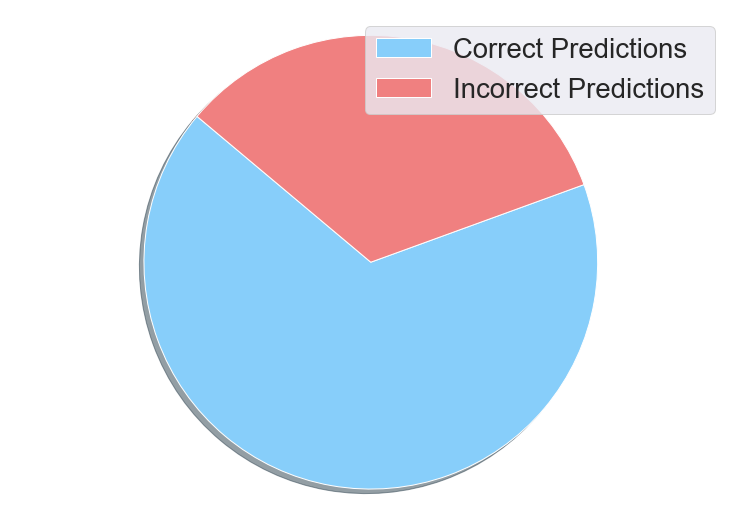

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.set(font_scale=2.5)
import matplotlib.pyplot as plt
labels = ['Correct Predictions', 'Incorrect Predictions']

listofpredictions = list(final_df['status'])
incorrect = 0
correct = 0
for i in range(len(listofpredictions)):
    if listofpredictions[i] == 'incorrect': 
        incorrect = incorrect + 1
    elif listofpredictions[i] == 'correct':
        correct = correct + 1
print(correct, incorrect)

numbers = [106, 53]
#sns.set(rc={'figure.figsize':(14.5,11.27)})
#ax = sns.barplot(x="x", y="x",  estimator=lambda x: len(x) / len(df) * 100)
plt.figure(figsize=(11,8))
colors = ['lightskyblue', 'lightcoral']
patches, texts = plt.pie(numbers, colors=colors, shadow=True, startangle=140)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#ax = sns.barplot(x="status", y="status", data=df)
#ax.set_title('Predictions on drug compounds from Drugs.com')